<a href="https://colab.research.google.com/github/andysontran/2-CHL5230-F23/blob/main/datathon_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
#load data
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()

# Read the dataset into a Pandas DataFrame
df = pd.read_csv(io.BytesIO(uploaded['CHL5230-F23-Datathon#1-Dataset2.csv']))

#Display the first few rows of the dataset to ensure its loaded correctly
df.head()

Saving CHL5230-F23-Datathon#1-Dataset2.csv to CHL5230-F23-Datathon#1-Dataset2.csv


,Age,Gender,Air Pollution,Alcohol Usage,Genetic Risk,Lung Disease,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Severity
0,33,1,2,4,3,2,4,3,2,2,4,0
1,17,1,3,1,4,2,2,2,4,2,3,1
2,35,1,4,5,5,4,7,2,3,4,8,2
3,37,1,7,7,6,7,7,7,7,7,8,2
4,46,1,6,8,7,6,7,8,7,7,9,2


In [5]:
#preprocess data
##check for missing values in each column
print(df.isna().sum())

Age                  0
Gender               0
Air Pollution        0
Alcohol Usage        0
Genetic Risk         0
Lung Disease         0
Obesity              0
Smoking              0
Passive Smoker       0
Chest Pain           0
Coughing of Blood    0
Severity             0
dtype: int64


In [18]:
##check for outliers
import plotly.express as px

# Create an interactive box plot for the 'Age' feature
fig_box = px.box(df, x='Coughing of Blood', y='Severity', title='Box Plot of Severity Grouped by Gender', color='Gender', color_discrete_sequence=['#0d7b94', '#82153d'])

# Customizing the layout and theme
fig_box.update_layout(template="plotly_white")

# Show the plot
fig_box.show('colab')

In [20]:
##check for outliers
import plotly.express as px

# Create an interactive box plot for the 'Age' feature
fig_box = px.box(df, x='Lung Disease', y='Severity', title='Box Plot of Severity Grouped by Gender', color='Gender', color_discrete_sequence=['#0d7b94', '#82153d'])

# Customizing the layout and theme
fig_box.update_layout(template="plotly_white")

# Show the plot
fig_box.show('colab')

In [6]:
##check for outliers
import plotly.express as px

# Create an interactive box plot for the 'Age' feature
fig_box = px.box(df, x='Gender', y='Severity', title='Box Plot of Severity Grouped by Gender', color='Gender', color_discrete_sequence=['#0d7b94', '#82153d'])

# Customizing the layout and theme
fig_box.update_layout(template="plotly_white")

# Show the plot
fig_box.show('colab')


In [17]:
##check for outliers
import plotly.express as px

# Create an interactive box plot for the 'Age' feature
fig_box = px.box(df, x='Air Pollution', y='Severity', title='Box Plot of Severity Grouped by Gender', color='Gender', color_discrete_sequence=['#0d7b94', '#82153d'])

# Customizing the layout and theme
fig_box.update_layout(template="plotly_white")

# Show the plot
fig_box.show('colab')

In [7]:
variance = df.var()
columns = df.columns
variable = []
for i in range(0,len(variance)):
  if variance[1]>=0.2:
    variable.append(columns[i])
variable

['Age',
 'Gender',
 'Air Pollution',
 'Alcohol Usage',
 'Genetic Risk',
 'Lung Disease',
 'Obesity',
 'Smoking',
 'Passive Smoker',
 'Chest Pain',
 'Coughing of Blood',
 'Severity']

In [11]:
#create a confusion matrix
import pandas as pd
df_c = pd. DataFrame(df)
corr_Matrix = df_c.corr()
print(corr_Matrix)


                        Age    Gender  Air Pollution  Alcohol Usage  \
Age                1.000000 -0.104146       0.041456       0.132828   
Gender            -0.104146  1.000000      -0.165097      -0.155158   
Air Pollution      0.041456 -0.165097       1.000000       0.512734   
Alcohol Usage      0.132828 -0.155158       0.512734       1.000000   
Genetic Risk       0.034801 -0.157086       0.427816       0.711012   
Lung Disease       0.080342 -0.141740       0.382661       0.594977   
Obesity            0.011607 -0.093119       0.379112       0.548102   
Smoking            0.052435 -0.170858       0.323364       0.487187   
Passive Smoker    -0.003206 -0.143020       0.412868       0.510851   
Chest Pain         0.013554 -0.166448       0.394851       0.603992   
Coughing of Blood  0.039650 -0.105924       0.365993       0.561570   
Severity           0.035742 -0.074792       0.382265       0.223088   

                   Genetic Risk  Lung Disease   Obesity   Smoking  \
Age    

In [12]:
import seaborn as sn
import matplotlib.pyplot as plt

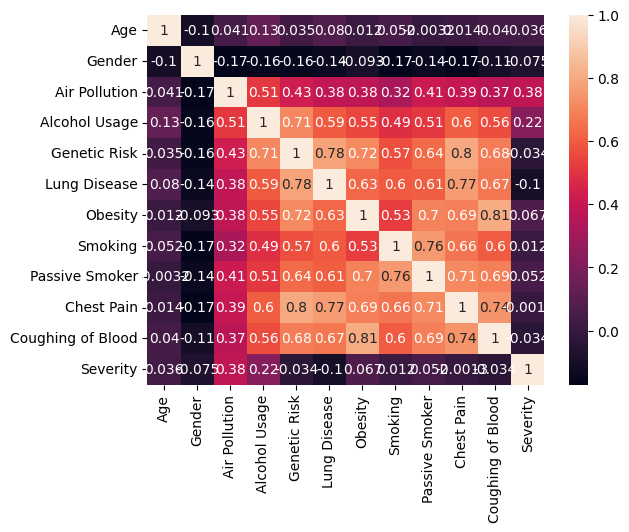

In [16]:
sn.heatmap(corr_Matrix, annot=True)
plt.show()

In [23]:
#Logistic Regression
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style = "white")
sns.set(style="whitegrid", color_codes=True)
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
import math
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix


In [22]:
df.columns


Index(['Age', 'Gender', 'Air Pollution', 'Alcohol Usage', 'Genetic Risk',
       'Lung Disease', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Severity'],
      dtype='object')

In [27]:
#define x and y
y_col = 'Severity'
y = df[y_col]
x_cols = [
    'Age',
    'Gender',
    'Air Pollution',
    'Alcohol Usage',
    'Genetic Risk',
    'Lung Disease',
    'Obesity',
    'Smoking',
    'Passive Smoker',
    'Chest Pain',
    'Coughing of Blood'
]
x = df[x_cols]

In [29]:
from numpy.random.mtrand import multinomial
model = LogisticRegression(solver='sag', random_state=0, multi_class= 'multinomial')

In [30]:
model.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



LogisticRegression(multi_class='multinomial', random_state=0, solver='sag')

In [33]:
beta_coefficients = model.coef_
for i, coef in enumerate(beta_coefficients):
  print(f'Feature {i}: {coef}')

Feature 0: [ 0.01135179  0.85286269 -0.01111513 -0.49312041  0.0465173   0.16990763
 -0.45486902  0.34787027 -0.1947577   0.18106214 -0.0665356 ]
Feature 1: [ 0.02322178 -0.02417909 -0.46707031 -0.04841372  0.45137681  0.18385094
  0.18082709 -0.37568333  0.0004774   0.10099429 -0.03539113]
Feature 2: [-0.08195443 -1.36649117 -0.15181932  0.35489024 -0.02448011 -0.05917272
  0.35175023 -0.12136486  0.68092591 -0.43979778  0.89635123]
Feature 3: [ 0.04738086  0.53780757  0.63000476  0.18664389 -0.473414   -0.29458585
 -0.0777083   0.14917792 -0.48664561  0.15774134 -0.79442451]


In [45]:
import statsmodels.api as sm
import numpy as np
x_with_intercept = sm.add_constant(x)
model_stats = sm.MNLogit(y, x_with_intercept)
results = model_stats.fit()
odds_ratios = np.exp(results.params)
p_values = results.pvalues

for i, (coef_name, odds_ratios, p_values) in enumerate(zip(x_with_intercept.columns, odds_ratios, p_values)):
   print(f'Feature {i}: {coef_name}, Odds Ratio: {odds_ratios:.4f}, p-value: {p_values:.4f}, Beta Coefficient: {results.params[i]:.4f}')

Optimization terminated successfully.
         Current function value: nan
         Iterations 15


/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:3025: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:3026: RuntimeWarning:

invalid value encountered in divide



TypeError: ignored